# TP 1: definition of functions and derivatives, level curves, Taylor's theorem, quadratic functions

This TP focuses on [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function) and the [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function) functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D # Not needed anymore with Matplotlib >= 3.2.0
import math

#%matplotlib inline  
#%matplotlib notebook

## Part 1: The Rosenbrock function

Rosenbrock function: 
$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2} .$$

It has a global minimum at $(x,y)=(a,a^{2})$, where $f(x,y)=0$.


### Question 1.1
Code the function and its derivatives (gradient and Hessian, the analytical expression). Chose as parameters $a=1$ and $b=10$.

In [2]:
def rosenbrock(t, a=1, b=10):
    """ Compute the Rosenbrock function of parameters (a,b) at t in R² """
    x, y = t
    return (x - a)**2 + b * (y - x**2)**2

def grad_rosenbrock(t, a=1, b=10):
    """
    Computation of the analytical form of the gradient of the Rosenbrock function
    
    Parameters
    ----------
    t: numpy.ndarray
        Evaluation points of shape (2,)
    a, b: float
        Parameters of the Rosenbrock function
    
    Returns
    -------
    g: numpy.ndarray
        Gradient at t of shape (2,)
        so that $g[0] = df/dx(t)$, $g[1] = df/dy(t)$
    """
    x, y = t
    g = np.zeros(2)
    g[0] = 2 * (x - a) - 4 * b * x * (y - x**2)
    g[1] = 2 * b * (y - x**2)
    return g

def hess_rosenbrock(t, a=1, b=10):
    """
    Computation of the analytical form of the Hessian of the Rosenbrock function
    
    Parameters
    ----------
    t: numpy.ndarray
        Evaluation points of shape (2,)
    a, b: float
        Parameters of the Rosenbrock function
    
    Returns
    -------
    h: numpy.ndarray
        Hessian at t of shape (2, 2)
        so that $h[0,0] = d²f/dx²(t)$, $h[1, 1] = d²f/dy²$
        and $h[1, 0] = h[0, 1] = d²f/dxdy$.
    """
    x, y = t
    h = np.zeros((2, 2))
    h[0, 0] = 2-4*b*(y-3*x**2)
    h[0, 1] = -4*b*x
    h[1, 0] = -4*b*x
    h[1, 1] = 2*b
    return h

### Question 1.2
Draw the plot of the surface of $f$ on $[-2, 2] \times [-1, 3]$.

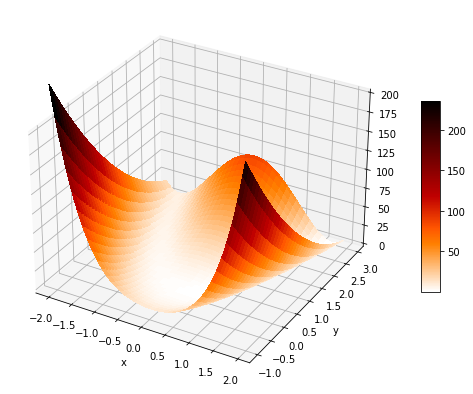

In [3]:
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = plt.axes(projection='3d')

# Evaluate function
x = np.arange(-2, 2, 0.05)
y = np.arange(-1, 3, 0.05)
X, Y = np.meshgrid(x, y, indexing='ij') # 2D arrays so that X[i,j] = x[i] and Y[i,j] = y[j]
Z = rosenbrock(np.stack((X, Y), axis=0)) # Pass an array of shape (2,...)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
axRos.set_xlabel('x')
axRos.set_ylabel('y')

plt.show()

### Question 1.3 
Consider a starting point $x_0=[-1.4,1.1]$ and the global optimum $x^*=[1,1]$. Draw the level curves of $f$ and mark the two points on the plot.

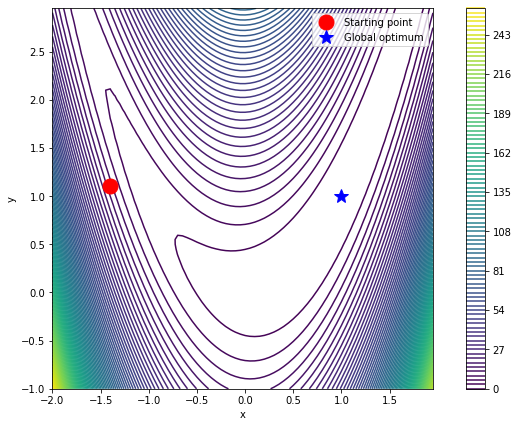

In [4]:
x0 = np.array([-1.4, 1.1])
xstar = np.array([1, 1])

# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X, Y, Z, 100)
plt.plot(x0[0], x0[1], marker='o', markersize=15, linestyle='', color ='r', label="Starting point")
plt.plot(xstar[0], xstar[1], marker='*', markersize=15, linestyle='', color ='b', label="Global optimum")
plt.axis("square") # Same horizontal and vertical scale
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.legend()
plt.show()

### Question 1.4
Compute the negative direction `s` of the gradient at the position $x_0$ (i.e. $-\nabla f(x_0)$) and plot it.

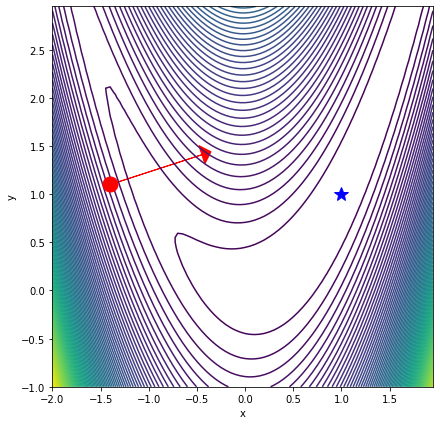

In [5]:
s = -grad_rosenbrock(x0)
norm_s = np.linalg.norm(s)

# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X, Y, Z, 100)
plt.plot(x0[0], x0[1], marker='o', markersize=15, color ='r')
plt.arrow(x0[0], x0[1], s[0] / norm_s, s[1] / norm_s, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot(xstar[0], xstar[1], marker='*', markersize=15, color ='b')
plt.axis("square")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### Question 1.5
How far can we go in this direction to keep the function decreasing?

Is there a descent trajectory from the starting point to the global optimum?

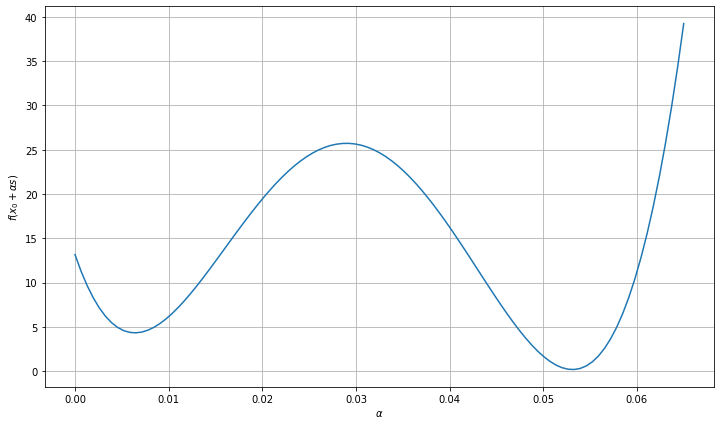

In [6]:
alpha = np.linspace(0, 0.065, 101)
z = [rosenbrock(x0 + a * s) for a in alpha]
#z = rosenbrock(x0[:, None] + alpha * s[:, None]) # Using broadcasting

plt.figure(figsize=(12, 7))
plt.plot(alpha, z)
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.grid()
plt.show()

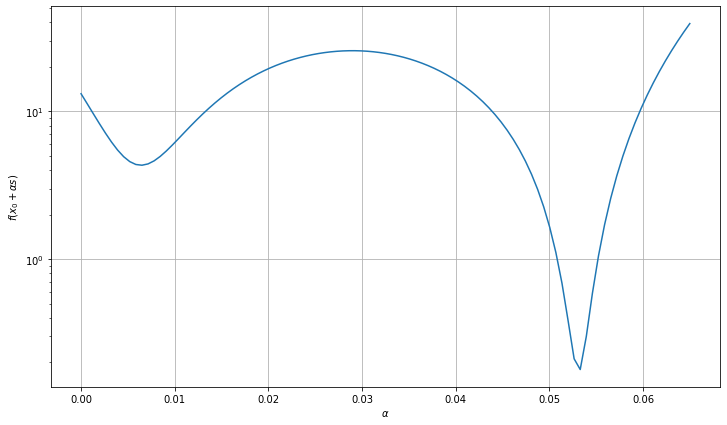

In [7]:
# In log scale
plt.figure(figsize=(12, 7))
plt.plot(alpha, z)
plt.yscale('log') # or plt.semilogy instead of plt.plot
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.grid()
plt.show()

## Part 2: The Rastrigin function

The $n$-dimensional Rastrigin function is defined by:

$$ 
f(x )=A n+\sum _{i=1}^{n}\left[x_{i}^{2}-A\cos(2\pi x_{i})\right]
$$

where $A=10$ and $x_{i}\in [-5.12,5.12]$. It has a global minimum at $x =0$  where $f(x )=0$.

### Question 2.1
We consider here $n=2$. Implement the code defining the function, the gradient and the Hessian.

In [8]:
def rastrigin(t, a=10):
    """ Compute the Rastrigin function of parameter a """
    x, y = t
    f = 2*a + x**2 - a * np.cos(2 * np.pi * x) \
        + y**2 - a * np.cos(2 * np.pi * y)
    return f

def grad_rastrigin(t, a=10):
    """
    Computation of the analytical form of the gradient of the Rosenbrock function
    
    Parameters
    ----------
    t: numpy.ndarray
        Evaluation points of shape (2,)
    a: float
        Parameter of the Rastrigin function
    
    Returns
    -------
    g: numpy.ndarray
        Gradient at t of shape (2,)
        so that $g[0] = df/dx(t)$, $g[1] = df/dy(t)$
    """
    x, y = t
    g = np.zeros(2)
    g[0] = 2 * x + a * 2 * np.pi * np.sin(2 * np.pi * x)
    g[1] = 2 * y + a * 2 * np.pi * np.sin(2 * np.pi * y)
    return g

def hess_rastrigin(x, a=10):
    """
    Computation of the analytical form of the Hessian of the Rosenbrock function
    
    Parameters
    ----------
    t: numpy.ndarray
        Evaluation points of shape (2,)
    a: float
        Parameter of the Rastrigin function
    
    Returns
    -------
    h: numpy.ndarray
        Hessian at t of shape (2, 2)
        so that $h[0,0] = d²f/dx²(t)$, $h[1, 1] = d²f/dy²$
        and $h[1, 0] = h[0, 1] = d²f/dxdy$.
    """
    x, y = t
    h = np.zeros((2,2))
    h[0, 0] = 2 + a * 4 * np.pi**2 * np.cos(2 * np.pi * x)
    h[1, 1] = 2 + a * 4 * np.pi**2 * np.cos(2 * np.pi * y)
    return h

### Question 2.2
Plot the surface of the function.

Is there a descent trajectory to the global optimum from any starting point?

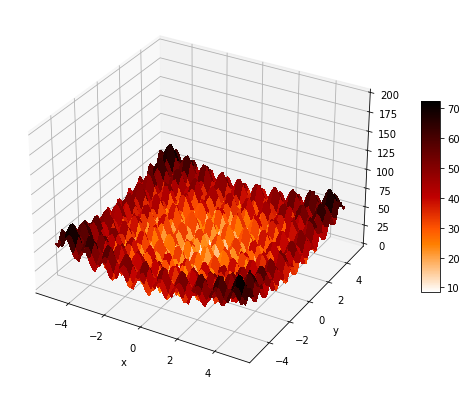

In [9]:
# Initialize figure 
figRas = plt.figure(figsize=(12, 7))
axRas = plt.axes(projection='3d')

# Evaluate function
X = np.arange(-5.12, 5.12, 0.15)
Y = np.arange(-5.12, 5.12, 0.15)
X, Y = np.meshgrid(X, Y, indexing="ij")
Z = rastrigin(np.stack((X, Y), axis=0))

# Plot the surface
surf = axRas.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRas.set_zlim(0, 200)
figRas.colorbar(surf, shrink=0.5, aspect=10)
axRas.set_xlabel('x')
axRas.set_ylabel('y')

plt.show()

## Part 3:  Quadratic function

In this section we study two different quadratic functions, defined by the matrices 
$$
    A = \begin{pmatrix} 1 & 2 \\ 2 & 1\end{pmatrix}
    \textrm{ and }
    B = \begin{pmatrix} 2 & -1 \\ -1 & 2 \end{pmatrix},
$$
i.e. $q_1(u) = u^\top A u$ and $q_2(u) = u^\top B u$.

### Question 4.1
Write the functions defining the quadratic forms and their derivatives.

What are the **stationary points** for these functions?

**TODO:** rajouter des trous ?

In [10]:

A = np.array([[1, 2], [2, 1]])
B = np.array([[2, -1], [-1, 2]])

q1 = lambda x, y: A[0, 0] * x**2 + A[0, 1] * x * y + A[1, 0] * x * y + A[1, 1] * y**2
q2 = lambda x, y: B[0, 0] * x**2 + B[0, 1] * x * y + B[1, 0] * x * y + B[1, 1] * y**2

def grad_q1(x, y):
  g = np.zeros(2)
  g[0] = 2 * A[0, 0] * x + A[0, 1] * y + A[1, 0] * y
  g[1] = A[0, 1] * x + A[1, 0] * x + 2 * A[1, 1] * y
  return g

def grad_q2(x, y):
  g = np.zeros(2)
  g[0] = 2 * B[0, 0] * x + B[0, 1] * y + B[1, 0] * y
  g[1] = B[0, 1] * x + B[1, 0] * x + 2 * B[1, 1] * y
  return g



### Question 4.2
1. Draw the contour plots and mark the stationary points.
2. Draw the starting point and the gradient direction for $q_1$ and $q_2$ and for starting points $x_0 = (-1, 1)$ and $x_0 = (1, 1)$.
3. What happens in the each case? Can you reach the stationary points (theoretically ? numerically ?)
4. What is the main difference between the two functions and which property of the functions causes the different behaviour ?


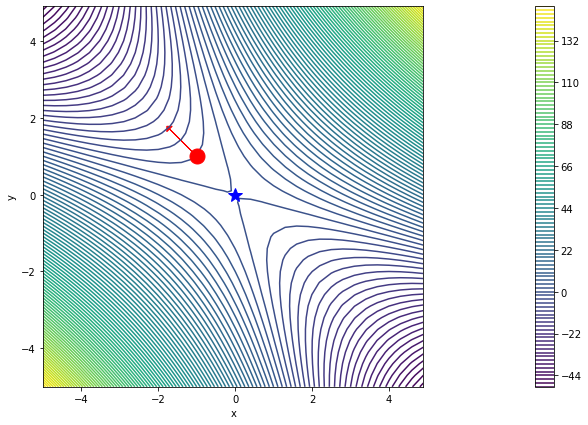

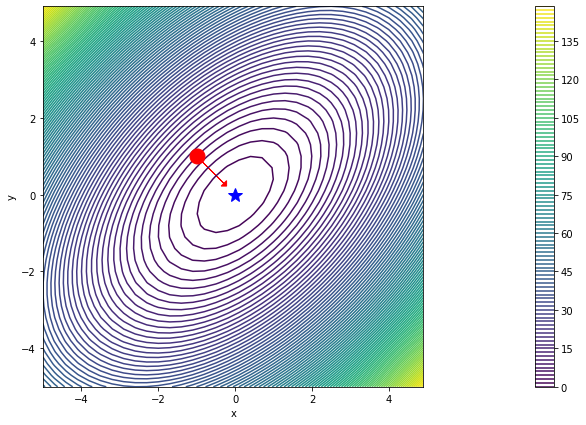

In [11]:
X = np.arange(-5, 5, 0.3)
Y = np.arange(-5, 5, 0.3)
X, Y = np.meshgrid(X, Y, indexing="ij")
Z1 = q1(X,Y)
Z2 = q2(X,Y)

# Stationary point
xstar = [0, 0]

# Try the two starting points
x0 = [-1, 1]
#x0 = [1, 1] 

s = -grad_q1(x0[0],x0[1])
ns = np.sqrt(s[0]**2 + s[1]**2)
plt.figure(figsize=(12, 7))
plt.contour(X, Y, Z1, 100)
plt.colorbar()
plt.plot(x0[0], x0[1], marker='o', markersize=15, color ='r')
plt.arrow(x0[0], x0[1], s[0]/ns, s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot(xstar[0], xstar[1], marker='*', markersize=15, color ='b')
plt.axis("square")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

s = -grad_q2(x0[0],x0[1])
ns = np.sqrt(s[0]**2 + s[1]**2)
plt.figure(figsize=(12, 7))
plt.contour(X, Y, Z2, 100)
plt.colorbar()
plt.plot(x0[0], x0[1], marker='o', markersize=15, color ='r')
plt.arrow(x0[0], x0[1], s[0]/ns, s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.plot(xstar[0], xstar[1], marker='*', markersize=15, color ='b')
plt.axis("square")
plt.xlabel("x")
plt.ylabel("y")
plt.show()




### Question 4.3
Draw the surface plots for the two functions

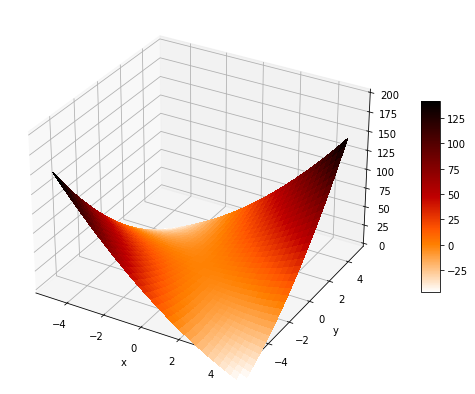

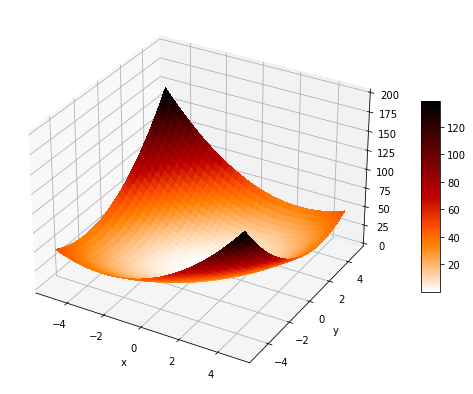

In [12]:
Z = q1(X, Y)

# Plot the surface
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Z = q2(X,Y)

# Plot the surface
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()